# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Oct 6th, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Yuyang Shao *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1002961636

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
len(dataset.feature_names)

30

In [ ]:
df = pd.DataFrame(data = dataset.data,columns= dataset.feature_names)
df['target'] = dataset.target
df['class'] = df['target'].replace(to_replace=[0,1], value = dataset.target_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [ ]:
len(df)

569

In [ ]:
len(df[df['mean area'] > 700])

171

In [ ]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-2],df.iloc[:,-2],test_size = 0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


In [ ]:
y_train.head()

478    1
303    1
155    1
186    0
101    1
Name: target, dtype: int64

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




In [ ]:
df_train = pd.DataFrame(data = X_train, columns = dataset.feature_names)
df_train['target'] = y_train
df_train['class'] = df_train['target'].replace(to_replace=[0,1], value = dataset.target_names)
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180,1,benign
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842,1,benign
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132,1,benign
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938,0,malignant
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737,0,malignant
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0,malignant
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1,benign
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,1,benign


In [ ]:
df_test = pd.DataFrame(data = X_test, columns = dataset.feature_names)
df_test['target'] = y_test
df_test['class'] = df_test['target'].replace(to_replace=[0,1], value = dataset.target_names)
df_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0,malignant
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1,benign
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1,benign
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1,benign
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0,malignant
408,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503,0,malignant
523,13.710,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031,1,benign
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658,1,benign


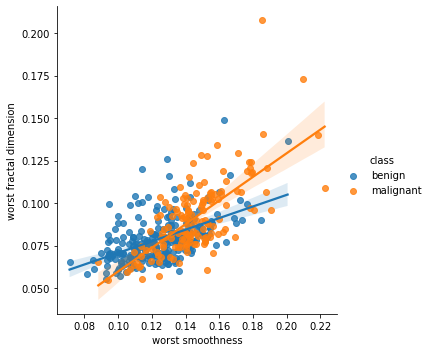

In [ ]:
### YOUR CODE HERE ###
# plot 1
sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue = 'class', data=df_train)

In [ ]:
y_train.shape

(398,)

In [ ]:
# obtain the standardized version of training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_std = pd.DataFrame(data = scaler.fit_transform(df_train.iloc[:,:-2]), columns = dataset.feature_names)
df_train_std['target'] = y_train.tolist()
df_train_std['class'] = df_train_std['target'].replace(to_replace=[0,1], value = dataset.target_names)
df_train_std

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,...,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628,1,benign
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,...,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414,1,benign
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,...,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716,1,benign
3,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,-1.225303,...,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466,0,malignant
4,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,2.266825,...,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.286694,0.188082,1.154672,1.202251,-0.521270,-0.887630,-0.110105,0.228545,-0.917089,-1.851347,...,0.617827,0.572352,-0.358400,-0.895147,-0.246265,0.216119,-0.512738,-1.469120,0,malignant
394,-0.480093,1.158165,-0.338161,-0.507950,1.591885,2.658965,1.774450,0.917898,0.795879,2.887031,...,-0.293051,-0.306224,2.298333,5.243276,4.333890,1.612342,2.326606,6.901830,0,malignant
395,-1.321473,-0.208553,-1.314385,-1.046877,0.318380,-0.873503,-0.790390,-0.904293,-1.074111,1.013278,...,-0.928196,-0.761422,0.033577,-0.967479,-0.798578,-0.986219,-0.691085,-0.131485,1,benign
396,-1.242455,-0.232447,-1.277599,-1.020928,-1.940832,-1.582194,-1.137578,-1.263267,-0.549515,0.266111,...,-1.321603,-0.988854,-2.672370,-1.473214,-1.391304,-1.756275,-1.551253,-1.010789,1,benign


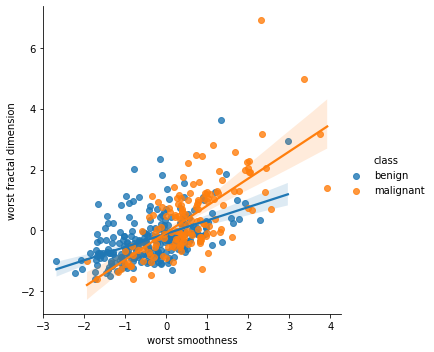

In [ ]:
#plot 2
sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue = 'class', data=df_train_std)


#### mean smoothness and mean_radius has very different scale

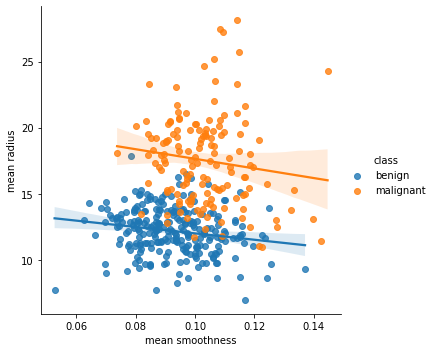

In [ ]:
#plot 3
sns.lmplot(x="mean smoothness", y="mean radius", hue = 'class', data=df_train)


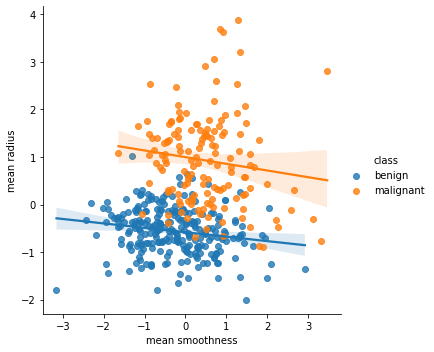

In [ ]:
sns.lmplot(x="mean smoothness", y="mean radius", hue = 'class', data=df_train_std)


The advantages of standardizing data are as follows. The raw data may have many different scaled values. Larger values may have greater imapct on the training model. But after standardization, the data have simmilar means and variances by removing the mean and scaling to unit variance,
which mitigates the impact of larger scaled values and the outliers. Also, standardization does not change the type of distribution and it reduces the mapping complexity.

In [ ]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180,1,benign
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842,1,benign
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132,1,benign
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938,0,malignant
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737,0,malignant
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0,malignant
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1,benign
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,1,benign


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [ ]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
cva = [] # cross validation accuaracy
ta = [] # training accuracy
for k in range(1,101):
  scores = cross_validate(neighbors.KNeighborsClassifier(n_neighbors=k), df_train.iloc[:,:-2], y_train, cv=5,return_train_score=True)
  cva.append(scores['test_score'].mean())
  ta.append(scores['train_score'].mean())

In [ ]:
# max cross validation accuracy is at k = 10
np.array(cva).argmax() + 1

10

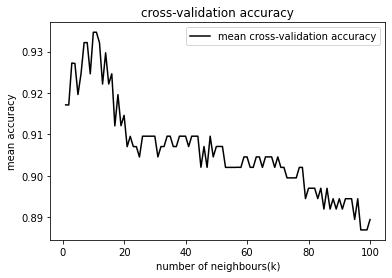

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(1,101)
plt.xlabel('number of neighbours(k)')
plt.ylabel('mean accuracy')
plt.title('cross-validation accuracy')
plt.plot(x, cva, label="mean cross-validation accuracy", color="black")
plt.legend()

In [ ]:
print("The best k is {}. The highest cross-validation accuracy is {}".format( np.array(cva).argmax() + 1, max(cva)))

The best k is 10. The highest cross-validation accuracy is 0.9346518987341772


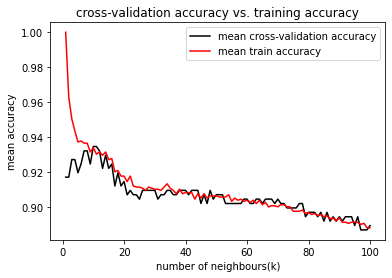

In [ ]:
plt.title('cross-validation accuracy vs. training accuracy')
plt.xlabel('number of neighbours(k)')
plt.ylabel('mean accuracy')
plt.plot(x, cva, label='mean cross-validation accuracy', color="black")
plt.plot(x, ta, label='mean train accuracy', color="red")
plt.legend()

In [ ]:
scores = cross_validate(neighbors.KNeighborsClassifier(n_neighbors=10), X_train, y_train, cv=5,return_train_score=True)
scores['test_score'].mean()
benchmark = scores['test_score'].mean()

In [ ]:
benchmark

0.9346518987341772

Underfitting happens when the machine does badly on both the training and the test(validation) dataset
and overfitting happens when the machine does good on the training dataset but poorly on the test(validation) dataset.
It is clear on the graph that our model is overfitted when k is small(k<10) because the model have high training accuaracy but low validation accuracy.
and the model is underfitted when k is larger(k>11) because the train and validation accuracy is relatively low and continue to go down.
Therefore, I think choosing the peak of the cross-validation accuracy curve(k = 10 or 11) is a good idea.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
### PLEASE NOTE THAT from this part to the end, the result of the same algorithm runs can differ from each other(because every iteration we have some features that have the same lowest importance)
### which may not be align with the interpretation I wrote when I run the algorithm myself. 

In [ ]:
from sklearn import tree
import copy
dt = tree.DecisionTreeClassifier()

In [ ]:
def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  importance = {}#importance dict
  removed_feature = [] # removed features
  cv = []#best cross validation score
  kv = []#corresponding k value
  highest_cv = -1#temporary store highest cv value
  k_value = -1#store corresponding k value
  features = copy.deepcopy(dataset.feature_names)
  X = copy.deepcopy(X_train)
  # full feature cross validation score we abtained above is 0.9346518987341772 when k = 10
  cv.append(benchmark)# full feature case
  kv.append(10) # both sandardized and non-standardized version of data have the optimal number of neighbours of 10 that corresponds to the best cv scores.

  while features.size > 1 and cv[-1] >= tr * benchmark : # 2 exit conditions
    dt.fit(X,y_train)#fit model
    for k,v in enumerate(dt.feature_importances_):
      importance.update({k:v})
    
    #break
    rm_index = min(importance.keys(), key=(lambda x: importance[x]))# get the feature index of minimum feature importance
    X = X.drop(X.columns[rm_index],axis = 1)# remove the feature as well as the data
    removed_feature.append(features[rm_index])
    features = np.delete(features,rm_index)
    #print(len(features))
    for i in range(1,101):#get the maximum mean validation accuracy and k
      scores = cross_validate(neighbors.KNeighborsClassifier(n_neighbors=i), X, y_train, cv=5,return_train_score=True)
      cvs = scores['test_score'].mean()
      if cvs > highest_cv:
        highest_cv = cvs
        k_value = i
      if i == 100:#last iteration, record the highest accuracy score so far and the corresponding k.
        cv.append(highest_cv)   
        kv.append(k_value)
    #print(importance)
    highest_cv = -1#reset
    k_value = -1#reset
    importance = {}#reset
    
  return removed_feature,cv,kv

In [ ]:
df_train.iloc[:,:-2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [ ]:
benchmark = 0.9346518987341772 #if not standardized use 0.9346518987341772, standardized use 0.9674367088607594 

In [ ]:
removed_features = []
cv_scores = []
best_k = []
removed_features,cv_scores,best_k=Feature_selector(X_train = df_train.iloc[:,:-2],y_train = y_train)

In [ ]:
np.array(removed_features).flatten()

array(['mean perimeter', 'mean radius', 'mean area', 'mean smoothness',
       'mean texture', 'mean compactness', 'mean concavity',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'compactness error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst perimeter', 'worst smoothness', 'worst area',
       'mean concave points', 'worst fractal dimension',
       'worst compactness', 'fractal dimension error', 'mean symmetry',
       'worst texture', 'worst concavity', 'worst symmetry', 'area error',
       'worst radius'], dtype='<U23')

In [ ]:
# the features left
set(dataset.feature_names) - set(np.array(removed_features).flatten())

{'worst concave points'}

In [ ]:
# best cv scores
cv_scores = np.array(cv_scores).flatten()# correspoends to 30 to 1 feature
cv_scores[::-1]

array([0.92462025, 0.91205696, 0.89936709, 0.89936709, 0.90946203,
       0.90205696, 0.90205696, 0.90205696, 0.90449367, 0.90449367,
       0.90449367, 0.91455696, 0.91455696, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.9346519 , 0.9346519 , 0.9346519 ])

In [ ]:
# best k
best_k = np.array(best_k).flatten()# correspoends to 30 to 1 feature
best_k[::-1]

array([34, 38,  3,  3,  3,  5,  5,  5,  1,  1,  1, 61, 61, 34, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 11, 11, 10])

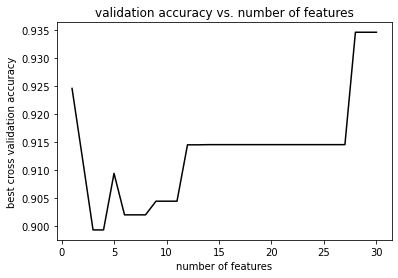

In [ ]:
x = np.arange(1, 31)
plt.ylabel('best cross validation accuracy')
plt.xlabel('number of features')
plt.title('validation accuracy vs. number of features')
plt.plot(x, cv_scores[::-1], color="black")
#plt.legend()

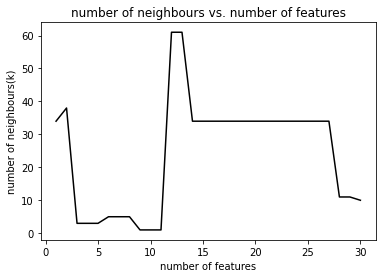

In [ ]:
plt.ylabel('number of neighbours(k)')
plt.xlabel('number of features')
plt.title('number of neighbours vs. number of features')
plt.plot(x, best_k[::-1], color="black")

In [ ]:
cv_scores = cv_scores[::-1]

In [ ]:
# index start from 0 to 29
np.argwhere(cv_scores == max(cv_scores)) 

array([[27],
       [28],
       [29]])

Based on the validation accuracy, when num of features = 28,29,30 give the best result.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [ ]:
# a standardized version of training data is already obtained in part 1
df_train_std.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,...,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628,1,benign
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,...,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414,1,benign
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,...,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716,1,benign
3,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,-1.225303,...,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466,0,malignant
4,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,2.266825,...,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260,1,benign


In [ ]:
scaler

StandardScaler()

In [ ]:
# only tranform the data, not fit it.
df_test_std = pd.DataFrame(data = scaler.transform(df_test.iloc[:,:-2]), columns = dataset.feature_names)
df_test_std['target'] = y_test.tolist()
df_test_std['class'] = df_test_std['target'].replace(to_replace=[0,1], value = dataset.target_names)
df_test_std.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,-0.218553,0.317107,-0.149384,-0.287243,1.016289,0.840148,0.713667,0.823176,1.102786,1.547385,...,0.161662,-0.083481,1.083204,0.861667,1.254202,1.369985,1.093961,1.515606,0,malignant
1,-0.271417,1.447278,-0.332906,-0.338596,-0.616243,-1.020853,-0.782447,-0.735274,-0.670850,-0.993273,...,-0.477842,-0.437692,-0.158056,-0.958356,-0.671121,-0.840956,-0.706868,-0.883103,1,benign
2,-0.046048,-0.844125,-0.110982,-0.151214,-1.209826,-0.947080,-0.870205,-0.586169,-0.777910,-0.990354,...,-0.325593,-0.343906,-1.268657,-0.988331,-1.066963,-0.503942,-1.192981,-0.926594,1,benign
3,0.020728,-0.244394,-0.045092,-0.078556,-2.209923,-1.017909,-0.820497,-0.912463,-0.613751,-0.990354,...,-0.056252,-0.124848,-1.658456,-0.238948,-0.580451,-0.608507,-0.403836,-0.387972,1,benign
4,-0.321500,-0.184660,-0.393137,-0.377110,-0.478100,-1.303191,-0.809351,-0.516978,-1.213290,-0.586125,...,-0.676288,-0.583396,-1.546961,-1.350055,-1.140898,-0.992163,-1.428146,-1.228245,1,benign


In [ ]:
cva = [] # cross validation accuaracy
ta = [] # training accuracy
for k in range(1,101):
  scores = cross_validate(neighbors.KNeighborsClassifier(n_neighbors=k), df_train_std.iloc[:,:-2], y_train, cv=5,return_train_score=True)
  cva.append(scores['test_score'].mean())
  ta.append(scores['train_score'].mean())

In [ ]:
# best k for full features validation
np.array(cva).argmax() + 1

10

In [ ]:
# best cv score for full features 
np.array(cva).max()

0.9674367088607594

In [ ]:
# change the benchmark from unstandardized version to standardized version
benchmark = 0.9674367088607594

In [ ]:
# we will use the above figures as benchmarks for the standardized wersion of feature selection
# need to change the benchmark variable for the algorithm.
removed_features2 = []
cv_scores2 = []
best_k2 = []
removed_features2,cv_scores2,best_k2=Feature_selector(X_train = df_train_std.iloc[:,:-2],y_train = y_train)

In [ ]:
np.array(removed_features2).flatten()

array(['mean radius', 'mean area', 'mean texture', 'mean perimeter',
       'mean smoothness', 'mean compactness', 'mean concave points',
       'mean concavity', 'mean fractal dimension', 'texture error',
       'perimeter error', 'smoothness error', 'compactness error',
       'concavity error', 'symmetry error', 'concave points error',
       'worst radius', 'worst perimeter', 'worst smoothness',
       'worst compactness', 'worst fractal dimension', 'radius error',
       'fractal dimension error', 'mean symmetry', 'worst concavity',
       'worst symmetry', 'worst texture', 'area error', 'worst area'],
      dtype='<U23')

In [ ]:
# same as before, cv scores corresponds to 30 features to 1 feature. Need to reverse it for later plotting.
cv_scores2 = cv_scores2[::-1]


In [ ]:
np.array(cv_scores2).flatten()

array([0.92462025, 0.9496519 , 0.95727848, 0.96990506, 0.96737342,
       0.9675    , 0.96240506, 0.95990506, 0.96240506, 0.96240506,
       0.95984177, 0.95477848, 0.96737342, 0.96234177, 0.96484177,
       0.96487342, 0.96234177, 0.95977848, 0.95734177, 0.95734177,
       0.95481013, 0.95731013, 0.95981013, 0.96234177, 0.95724684,
       0.95984177, 0.96234177, 0.96496835, 0.96496835, 0.96743671])

In [ ]:
# 4 features give the highest cv score
np.argmax(np.array(cv_scores2)) + 1

4

In [ ]:
# the highest cv score
np.max(np.array(cv_scores2))

0.9699050632911392

In [ ]:
# need to reverse it for the same reason
best_k2 = np.array(best_k2[::-1])

In [ ]:
best_k2.flatten()

array([34,  6,  5,  6,  6,  8, 10, 24, 18,  4,  6, 11,  8,  6,  8,  8,  4,
        5,  8,  7,  7,  8,  8,  7,  5,  8,  5,  8,  8, 10])

In [ ]:
# the corresponding best k
best_k2[np.argmax(np.array(cv_scores2))]

6

In [ ]:
print("When we have 4 features left and 6 neighbours, the cross validation accuracy is the highest")

When we have 4 features left and 6 neighbours, the cross validation accuracy is the highest


In [ ]:
# the features left after feature selection
set(dataset.feature_names) - set(removed_features2)

{'worst concave points'}

In [ ]:
# we want to get the last 4 features and the corresponding k values
optimal_features = list()
optimal_features.append(removed_features2[-3:]) # the last 3 removed features plus the last feature remains will be the optimal set of features.
optimal_features = optimal_features[0]
remaining_feature = list(set(dataset.feature_names) - set(removed_features2))[0]
optimal_features.append(remaining_feature)
optimal_features

['worst texture', 'area error', 'worst area', 'worst concave points']

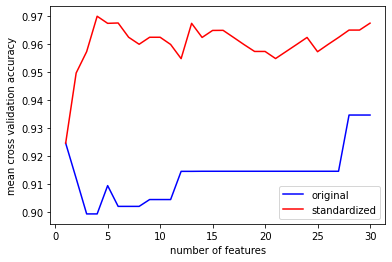

In [ ]:
plt.ylabel('mean cross validation accuracy')
plt.xlabel('number of features')
plt.title('')
plt.plot(x, cv_scores,label='original', color="blue")
plt.plot(x, cv_scores2, label = 'standardized',color="red")
plt.legend()

Obviously, standardization makes the model much more accurate. It convert all the input data to the same scale so that features that have very different scales will not have greater impact on the model.

The standardized version gives the highest CV accuracy. The optimal number of features is 6 with a k of 8(8 neighbours). The features are as follows:

In [ ]:
optimal_features

['worst texture', 'area error', 'worst area', 'worst concave points']

In [ ]:
len(removed_features2)

29

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### YOUR CODE HERE ###
cva2 = [] # cross validation accuaracy
#ta2 = [] # training accuracy
for k in range(1,200):# max depth
  for i in np.linspace(0.1, 1.0, 10, endpoint=True): #vary the parameter from 10% to 100% of the samples
    scores = cross_validate(DecisionTreeClassifier(max_depth=k,min_samples_split=i), df_train_std.iloc[:,:-2], y_train, cv=5,return_train_score=True)
    cva2.append(scores['test_score'].mean())
    #print("k:",k,"i:",i)
    #ta2.append(scores['train_score'].mean())


In [ ]:
# recall from the KNN session, we get the optimal CV accuracy using standardized data
#np.array(cva).argmax() + 1
np.array(cva).max()

0.9674367088607594

In [ ]:
# the best cv scores for decison tree classifier
np.array(cva2).max()

0.9095886075949366

It is obvious that KNN does much better than decision trees using the standardized dataset for this problem

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df_test_std.iloc[:,:-2].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.218553,0.317107,-0.149384,-0.287243,1.016289,0.840148,0.713667,0.823176,1.102786,1.547385,...,0.010159,0.671930,0.161662,-0.083481,1.083204,0.861667,1.254202,1.369985,1.093961,1.515606
1,-0.271417,1.447278,-0.332906,-0.338596,-0.616243,-1.020853,-0.782447,-0.735274,-0.670850,-0.993273,...,-0.405253,1.416262,-0.477842,-0.437692,-0.158056,-0.958356,-0.671121,-0.840956,-0.706868,-0.883103
2,-0.046048,-0.844125,-0.110982,-0.151214,-1.209826,-0.947080,-0.870205,-0.586169,-0.777910,-0.990354,...,-0.292325,-1.013809,-0.325593,-0.343906,-1.268657,-0.988331,-1.066963,-0.503942,-1.192981,-0.926594
3,0.020728,-0.244394,-0.045092,-0.078556,-2.209923,-1.017909,-0.820497,-0.912463,-0.613751,-0.990354,...,-0.028155,-0.044712,-0.056252,-0.124848,-1.658456,-0.238948,-0.580451,-0.608507,-0.403836,-0.387972
4,-0.321500,-0.184660,-0.393137,-0.377110,-0.478100,-1.303191,-0.809351,-0.516978,-1.213290,-0.586125,...,-0.616992,-0.443752,-0.676288,-0.583396,-1.546961,-1.350055,-1.140898,-0.992163,-1.428146,-1.228245


In [ ]:
optimal_features

['worst texture', 'area error', 'worst area', 'worst concave points']

In [ ]:
# The best model so far is the KNN model with 4 features and 6 neighbours. 
# 6 optimal features are used here
knn_6 = neighbors.KNeighborsClassifier(n_neighbors=6)
knn_6.fit(df_train_std.loc[:,optimal_features], y_train)
prediction = knn_6.predict(df_test_std.loc[:,optimal_features])
accuracy = accuracy_score(y_test, prediction)
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  95.32163742690058 %


In [ ]:
confusion_matrix(y_pred=prediction,y_true=y_test)

array([[ 59,   4],
       [  4, 104]])

In [ ]:
df_test_std.loc[:,optimal_features]

,worst texture,area error,worst area,worst concave points
0,0.671930,-0.155006,-0.083481,1.369985
1,1.416262,-0.478306,-0.437692,-0.840956
2,-1.013809,-0.444751,-0.343906,-0.503942
3,-0.044712,-0.418429,-0.124848,-0.608507
4,-0.443752,-0.547025,-0.583396,-0.992163
...,...,...,...,...
166,0.424363,0.192405,0.004611,0.615475
167,-0.020281,0.169298,0.761600,1.252616
168,0.015551,-0.300079,-0.322134,0.200876
169,0.597009,-0.409989,-0.457287,-0.900555


Accuracy score is calculated as :Number of correct predictions/Total number of predictions. To be more specific, 
 it is (true positives + true negatives)/(true positives + true negatives + false positives + false negatives).<br>
 FN is a bit more than FP. <br>
I applied the KNN model with k =6 on the testing data(with only optimal features) as suggested in the previous algorithm results. The accuracy score is 95.32%, suggesting that the model did well on both the training and test data.<br>And there is no obvious overfitting or underfitting problem since the test accuracy does not drop much compared to the training and validation accuracy. <br> The final test accuracy is within acceptable range.
 

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/